## Prilikom meteorske kise imamo 210 meteora po satu. Kakva je raspodela verovatnoce broja meteora u jednom minutu?

In [1]:
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import math
from numpy.random import default_rng


100%|██████████| 1000/1000 [00:04<00:00, 211.13it/s]


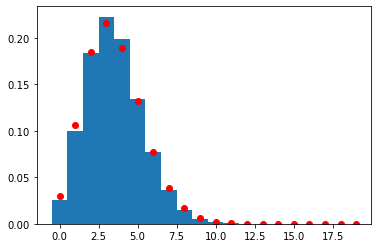

In [2]:
rng = default_rng()

br_izoraka = 1000
br_po_uzorku = 3600
lam = 210


# generisemo uzorak clanova gde su sve su sve 0 osim lam
kontinuum = np.array([])

for i in tqdm(range(br_izoraka)):
    uzorak = np.zeros(br_po_uzorku)
    meteor = rng.choice(br_po_uzorku, size = lam, replace=False)
    for j in meteor:
        uzorak[j] = 1
    kontinuum=np.append(kontinuum,uzorak)

br_eksperimenata = 100000
br_meteora = np.zeros(br_eksperimenata)

novi_uzorak = 60

for i in range (br_eksperimenata):
    pocetak = np.random.randint(0,len(kontinuum)-novi_uzorak)
    test = kontinuum[pocetak:pocetak+novi_uzorak]
    br_meteora[i] = sum(test)

plt.hist(br_meteora,np.arange(max(br_meteora)),density=True,align='left')

k = np.arange(0,20)
p = np.zeros(len(k))
lam = 210/60

for i in range(len(k)):
    p[i]=np.exp(-lam)*lam**k[i]/math.factorial(k[i])

plt.plot(k,p,'or')
plt.show()